In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/content/drive/MyDrive/Data/Constraint_Val.csv
/content/drive/MyDrive/Data/Constraint_Test.csv
/content/drive/MyDrive/Data/Constraint_Train.csv


In [ ]:
import pandas as pd

train = pd.read_csv("/content/drive/MyDrive/new_liar/train.csv")
valid = pd.read_csv("/content/drive/MyDrive/new_liar/valid.csv")
test = pd.read_csv("/content/drive/MyDrive/new_liar/test.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

data = pd.concat([train,valid,test])
data = data.dropna(subset=['job title', 'state info'])
data = data.drop(columns=['id'])
data.head(20)


data.head()

,label,text,subject,speaker,job title,state info,party,barely true,false,half true,mostly true,pants on fire,context
0,FALSE,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
5,TRUE,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece
7,half-true,I'm the only person on this stage who has work...,ethics,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,"a Democratic debate in Philadelphia, Pa."


In [ ]:
!pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.2 MB/s eta 0:00:00


In [ ]:
!pip install transformers

import time
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression  # Import LogisticRegression
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score, roc_curve, auc
)
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    BaggingClassifier,
    VotingClassifier,
    StackingClassifier,
)
from sklearn.naive_bayes import MultinomialNB
import transformers
from torch.utils.data import DataLoader, TensorDataset
import torch
import matplotlib.pyplot as plt

# The rest of your code remains the same...


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 23.7 MB/s eta 0:00:00


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import StackingClassifier
import matplotlib.pyplot as plt

# Load the Liar dataset CSV file
# data = pd.read_csv('your_liar_dataset.csv')

# Preprocessing and tokenization
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    text = [word for word in text if word not in stopwords.words('english')]
    text = [stemmer.stem(lemmatizer.lemmatize(word)) for word in text]
    return ' '.join(text)

data['text'] = data['text'].apply(preprocess)

# Split the dataset into features and labels
X = data['text']
y = data['label']

# Encode labels if they are not already in numeric format
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Create TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Feature Selection using SelectKBest with Chi-squared test
X_tfidf_selected = SelectKBest(chi2, k=1000).fit_transform(X_tfidf, y)

# Split the dataset into train, validation, and test sets (60-20-20 split ratio)
X_train, X_temp, y_train, y_temp = train_test_split(X_tfidf_selected, y, test_size=0.4, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Model Section

# Booster Sections

# Random Forest
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Calculate training, validation, and testing accuracies
rf_training_accuracy = accuracy_score(y_train, rf_classifier.predict(X_train))
rf_validation_accuracy = accuracy_score(y_validation, rf_classifier.predict(X_validation))
rf_testing_accuracy = accuracy_score(y_test, rf_classifier.predict(X_test))

# Display Random Forest results
print("Random Forest Classifier:")
print(f"Training Accuracy: {rf_training_accuracy:.2f}")
print(f"Validation Accuracy: {rf_validation_accuracy:.2f}")
print(f"Testing Accuracy: {rf_testing_accuracy:.2f}")
print()

# Gradient Boosting
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)

# Calculate training, validation, and testing accuracies
gb_training_accuracy = accuracy_score(y_train, gb_classifier.predict(X_train))
gb_validation_accuracy = accuracy_score(y_validation, gb_classifier.predict(X_validation))
gb_testing_accuracy = accuracy_score(y_test, gb_classifier.predict(X_test))

# Display Gradient Boosting results
print("Gradient Boosting Classifier:")
print(f"Training Accuracy: {gb_training_accuracy:.2f}")
print(f"Validation Accuracy: {gb_validation_accuracy:.2f}")
print(f"Testing Accuracy: {gb_testing_accuracy:.2f}")
print()

# AdaBoost
ab_classifier = AdaBoostClassifier()
ab_classifier.fit(X_train, y_train)

# Calculate training, validation, and testing accuracies
ab_training_accuracy = accuracy_score(y_train, ab_classifier.predict(X_train))
ab_validation_accuracy = accuracy_score(y_validation, ab_classifier.predict(X_validation))
ab_testing_accuracy = accuracy_score(y_test, ab_classifier.predict(X_test))

# Display AdaBoost results
print("AdaBoost Classifier:")
print(f"Training Accuracy: {ab_training_accuracy:.2f}")
print(f"Validation Accuracy: {ab_validation_accuracy:.2f}")
print(f"Testing Accuracy: {ab_testing_accuracy:.2f}")
print()

# XGBoost
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

# Calculate training, validation, and testing accuracies
xgb_training_accuracy = accuracy_score(y_train, xgb_classifier.predict(X_train))
xgb_validation_accuracy = accuracy_score(y_validation, xgb_classifier.predict(X_validation))
xgb_testing_accuracy = accuracy_score(y_test, xgb_classifier.predict(X_test))

# Display XGBoost results
print("XGBoost Classifier:")
print(f"Training Accuracy: {xgb_training_accuracy:.2f}")
print(f"Validation Accuracy: {xgb_validation_accuracy:.2f}")
print(f"Testing Accuracy: {xgb_testing_accuracy:.2f}")
print()

# LightGBM
lgbm_classifier = LGBMClassifier()
lgbm_classifier.fit(X_train, y_train)

# Calculate training, validation, and testing accuracies
lgbm_training_accuracy = accuracy_score(y_train, lgbm_classifier.predict(X_train))
lgbm_validation_accuracy = accuracy_score(y_validation, lgbm_classifier.predict(X_validation))
lgbm_testing_accuracy = accuracy_score(y_test, lgbm_classifier.predict(X_test))

# Display LightGBM results
print("LightGBM Classifier:")
print(f"Training Accuracy: {lgbm_training_accuracy:.2f}")
print(f"Validation Accuracy: {lgbm_validation_accuracy:.2f}")
print(f"Testing Accuracy: {lgbm_testing_accuracy:.2f}")
print()

# CatBoost
catboost_classifier = CatBoostClassifier(silent=True)
catboost_classifier.fit(X_train, y_train)

# Calculate training, validation, and testing accuracies
catboost_training_accuracy = accuracy_score(y_train, catboost_classifier.predict(X_train))
catboost_validation_accuracy = accuracy_score(y_validation, catboost_classifier.predict(X_validation))
catboost_testing_accuracy = accuracy_score(y_test, catboost_classifier.predict(X_test))

# Display CatBoost results
print("CatBoost Classifier:")
print(f"Training Accuracy: {catboost_training_accuracy:.2f}")
print(f"Validation Accuracy: {catboost_validation_accuracy:.2f}")
print(f"Testing Accuracy: {catboost_testing_accuracy:.2f}")
print()

# Bagging
bagging_classifier = BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=10, random_state=42)
bagging_classifier.fit(X_train, y_train)

# Calculate training, validation, and testing accuracies for Bagging
bagging_training_accuracy = accuracy_score(y_train, bagging_classifier.predict(X_train))
bagging_validation_accuracy = accuracy_score(y_validation, bagging_classifier.predict(X_validation))
bagging_testing_accuracy = accuracy_score(y_test, bagging_classifier.predict(X_test))

# Display Bagging results
print("Bagging Classifier:")
print(f"Training Accuracy: {bagging_training_accuracy:.2f}")
print(f"Validation Accuracy: {bagging_validation_accuracy:.2f}")
print(f"Testing Accuracy: {bagging_testing_accuracy:.2f}")
print()

# Stacking
estimators = [
    ('Random Forest', rf_classifier),
    ('Gradient Boosting', gb_classifier),
    ('AdaBoost', ab_classifier),
    ('XGBoost', xgb_classifier),
    ('LightGBM', lgbm_classifier),
    ('CatBoost', catboost_classifier)
]

stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_classifier.fit(X_train, y_train)

# Calculate training, validation, and testing accuracies for Stacking
stacking_training_accuracy = accuracy_score(y_train, stacking_classifier.predict(X_train))
stacking_validation_accuracy = accuracy_score(y_validation, stacking_classifier.predict(X_validation))
stacking_testing_accuracy = accuracy_score(y_test, stacking_classifier.predict(X_test))

# Display Stacking results
print("Stacking Classifier:")
print(f"Training Accuracy: {stacking_training_accuracy:.2f}")
print(f"Validation Accuracy: {stacking_validation_accuracy:.2f}")
print(f"Testing Accuracy: {stacking_testing_accuracy:.2f}")
print()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Random Forest Classifier:
Training Accuracy: 0.95
Validation Accuracy: 0.40
Testing Accuracy: 0.40

Gradient Boosting Classifier:
Training Accuracy: 0.50
Validation Accuracy: 0.31
Testing Accuracy: 0.34

AdaBoost Classifier:
Training Accuracy: 0.25
Validation Accuracy: 0.21
Testing Accuracy: 0.22

XGBoost Classifier:
Training Accuracy: 0.64
Validation Accuracy: 0.35
Testing Accuracy: 0.36

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008831 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4570
[LightGBM] [Info] Number of data points in the train set: 6157, number of used features: 142
[LightGBM] [Info] Start training from score -1.647003
[LightGBM] [Info] Start training from score -1.817590
[LightGBM] [Info] Start training from score -1.829662
[LightGBM] [Info] Start training from score -1.566831
[LightGBM] [Info] Start training fr

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Classifier:
Training Accuracy: 0.91
Validation Accuracy: 0.39
Testing Accuracy: 0.40

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008625 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4570
[LightGBM] [Info] Number of data points in the train set: 6157, number of used features: 142
[LightGBM] [Info] Start training from score -1.647003
[LightGBM] [Info] Start training from score -1.817590
[LightGBM] [Info] Start training from score -1.829662
[LightGBM] [Info] Start training from score -1.566831
[LightGBM] [Info] Start training from score -1.576213
[LightGBM] [Info] Start training from score -2.673256
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003942 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Stacking Classifier:
Training Accuracy: 0.95
Validation Accuracy: 0.40
Testing Accuracy: 0.41



In [ ]:
import time
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier, StackingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt

# Start overall timer
start_time = time.time()

# Load the Liar dataset CSV file (Replace 'your_liar_dataset.csv' with your dataset)
# data = pd.read_csv('your_liar_dataset.csv')

# Preprocessing and tokenization
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    text = [word for word in text if word not in stopwords.words('english')]
    text = [stemmer.stem(lemmatizer.lemmatize(word)) for word in text]
    return ' '.join(text)

# Timer for data preprocessing
preprocessing_start_time = time.time()
data['text'] = data['text'].apply(preprocess)
preprocessing_end_time = time.time()
preprocessing_elapsed_time = preprocessing_end_time - preprocessing_start_time
print(f"Data Preprocessing Time: {preprocessing_elapsed_time:.2f} seconds")
print()

# Split the dataset into features and labels
X = data['text']
y = data['label']

# Encode labels if they are not already in numeric format
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Create TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Feature Selection using SelectKBest with Chi-squared test
X_tfidf_selected = SelectKBest(chi2, k=1000).fit_transform(X_tfidf, y)

# Split the dataset into train, validation, and test sets (60-20-20 split ratio)
X_train, X_temp, y_train, y_temp = train_test_split(X_tfidf_selected, y, test_size=0.4, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define different classifiers
classifiers = [
    ('Random Forest', RandomForestClassifier()),
    ('Logistic Regression', LogisticRegression(solver='liblinear')),
    ('Extra Trees', ExtraTreesClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Multinomial Naive Bayes', MultinomialNB())
]

# Timer for model training
training_start_time = time.time()

for name, classifier in classifiers:
    # Timer for each model training
    model_training_start_time = time.time()

    # Perform cross-validation
    cv_scores = cross_val_score(classifier, X_train, y_train, cv=5, scoring='accuracy')

    # Train and evaluate the classifier
    classifier.fit(X_train, y_train)
    y_validation_pred = classifier.predict(X_validation)

    # Calculate validation accuracy
    validation_accuracy = accuracy_score(y_validation, y_validation_pred)

    # Display results
    print(f"Classifier: {name}")
    print(f"Cross-Validation Accuracy: {np.mean(cv_scores):.2f} (+/- {np.std(cv_scores):.2f})")
    print(f"Validation Accuracy: {validation_accuracy:.2f}")

    # If using RandomForest or ExtraTrees, you can inspect feature importances
    if name in ['Random Forest', 'Extra Trees']:
        feature_importances = classifier.feature_importances_
        top_features_indices = feature_importances.argsort()[::-1][:10]
        print(f"Top 10 Important Features: {tfidf_vectorizer.get_feature_names_out()[top_features_indices]}\n")

    # Timer for each model training
    model_training_end_time = time.time()
    model_training_elapsed_time = model_training_end_time - model_training_start_time
    print(f"Training Time for {name}: {model_training_elapsed_time:.2f} seconds")
    print()

# Timer for model training
training_end_time = time.time()
training_elapsed_time = training_end_time - training_start_time
print(f"Total Training Time: {training_elapsed_time:.2f} seconds")
print()

# Timer for model evaluation
evaluation_start_time = time.time()

# Select the best classifier based on validation accuracy
best_classifier = classifiers[np.argmax([accuracy_score(classifier.predict(X_validation), y_validation) for name, classifier in classifiers])][1]

# Timer for Testing
testing_start_time = time.time()
# Evaluate the best classifier on the test set
y_test_pred = best_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
testing_end_time = time.time()
testing_elapsed_time = testing_end_time - testing_start_time
print(f"Testing Time: {testing_elapsed_time:.2f} seconds")

# Display test set results
print(f"Best Classifier: {best_classifier}")
print(f"Testing Accuracy: {test_accuracy:.2f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_test_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_test_pred)}")

# Timer for model evaluation
evaluation_end_time = time.time()
evaluation_elapsed_time = evaluation_end_time - evaluation_start_time
print(f"Evaluation Time: {evaluation_elapsed_time:.2f} seconds")
print()

# Timer for ensemble methods
ensemble_start_time = time.time()

# AdaBoost
adaboost_start_time = time.time()
adaboost_classifier = AdaBoostClassifier()
adaboost_classifier.fit(X_train, y_train)
adaboost_accuracy = accuracy_score(y_test, adaboost_classifier.predict(X_test))
adaboost_end_time = time.time()
adaboost_elapsed_time = adaboost_end_time - adaboost_start_time
print("AdaBoost Classifier:")
print(f"Training Time: {adaboost_elapsed_time:.2f} seconds")
print(f"Testing Accuracy: {adaboost_accuracy:.2f}")
print()

# Gradient Boosting
gb_start_time = time.time()
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)
gb_accuracy = accuracy_score(y_test, gb_classifier.predict(X_test))
gb_end_time = time.time()
gb_elapsed_time = gb_end_time - gb_start_time
print("Gradient Boosting Classifier:")
print(f"Training Time: {gb_elapsed_time:.2f} seconds")
print(f"Testing Accuracy: {gb_accuracy:.2f}")
print()

# eXtreme Gradient Boosting - XGBoost (Install xgboost package)
xgb_start_time = time.time()
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)
xgb_accuracy = accuracy_score(y_test, xgb_classifier.predict(X_test))
xgb_end_time = time.time()
xgb_elapsed_time = xgb_end_time - xgb_start_time
print("XGBoost Classifier:")
print(f"Training Time: {xgb_elapsed_time:.2f} seconds")
print(f"Testing Accuracy: {xgb_accuracy:.2f}")
print()

# LightGBM (Install lightgbm package)
lightgbm_start_time = time.time()
import lightgbm as lgb
lgb_classifier = lgb.LGBMClassifier()
lgb_classifier.fit(X_train, y_train)
lgb_accuracy = accuracy_score(y_test, lgb_classifier.predict(X_test))
lightgbm_end_time = time.time()
lightgbm_elapsed_time = lightgbm_end_time - lightgbm_start_time
print("LightGBM Classifier:")
print(f"Training Time: {lightgbm_elapsed_time:.2f} seconds")
print(f"Testing Accuracy: {lgb_accuracy:.2f}")
print()

# CatBoost (Install catboost package)
catboost_start_time = time.time()
from catboost import CatBoostClassifier
catboost_classifier = CatBoostClassifier()
catboost_classifier.fit(X_train, y_train)
catboost_accuracy = accuracy_score(y_test, catboost_classifier.predict(X_test))
catboost_end_time = time.time()
catboost_elapsed_time = catboost_end_time - catboost_start_time
print("CatBoost Classifier:")
print(f"Training Time: {catboost_elapsed_time:.2f} seconds")
print(f"Testing Accuracy: {catboost_accuracy:.2f}")
print()

# Timer for ensemble methods
ensemble_end_time = time.time()
ensemble_elapsed_time = ensemble_end_time - ensemble_start_time
print(f"Ensemble Methods Time: {ensemble_elapsed_time:.2f} seconds")
print()

# Bagging
bagging_start_time = time.time()
bagging_classifier = BaggingClassifier()
bagging_classifier.fit(X_train, y_train)
bagging_accuracy = accuracy_score(y_test, bagging_classifier.predict(X_test))
bagging_end_time = time.time()
bagging_elapsed_time = bagging_end_time - bagging_start_time
print("Bagging Classifier:")
print(f"Training Time: {bagging_elapsed_time:.2f} seconds")
print(f"Testing Accuracy: {bagging_accuracy:.2f}")
print()

# Stacking
stacking_start_time = time.time()
estimators = [
    ('rf', RandomForestClassifier()),
    ('et', ExtraTreesClassifier()),
    ('nb', MultinomialNB())
]
stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_classifier.fit(X_train, y_train)
stacking_accuracy = accuracy_score(y_test, stacking_classifier.predict(X_test))
stacking_end_time = time.time()
stacking_elapsed_time = stacking_end_time - stacking_start_time
print("Stacking Classifier:")
print(f"Training Time: {stacking_elapsed_time:.2f} seconds")
print(f"Testing Accuracy: {stacking_accuracy:.2f}")
print()

# Voting
voting_start_time = time.time()
voting_classifier = VotingClassifier(estimators=estimators)
voting_classifier.fit(X_train, y_train)
voting_accuracy = accuracy_score(y_test, voting_classifier.predict(X_test))
voting_end_time = time.time()
voting_elapsed_time = voting_end_time - voting_start_time
print("Voting Classifier:")
print(f"Training Time: {voting_elapsed_time:.2f} seconds")
print(f"Testing Accuracy: {voting_accuracy:.2f}")
print()

# Overall elapsed time
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Total Elapsed Time: {elapsed_time:.2f} seconds")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Data Preprocessing Time: 53.98 seconds

Classifier: Random Forest
Cross-Validation Accuracy: 0.38 (+/- 0.01)
Validation Accuracy: 0.40
Top 10 Important Features: ['arabia' 'battleground' 'allen' '00' 'ailment' '168k' 'amount' 'agallup'
 '838' '72']

Training Time for Random Forest: 73.90 seconds

Classifier: Logistic Regression
Cross-Validation Accuracy: 0.32 (+/- 0.01)
Validation Accuracy: 0.32
Training Time for Logistic Regression: 0.38 seconds

Classifier: Extra Trees
Cross-Validation Accuracy: 0.38 (+/- 0.01)
Validation Accuracy: 0.39
Top 10 Important Features: ['arabia' 'battleground' 'allen' '00' 'ailment' '168k' 'amount' '72'
 'anonym' 'agallup']

Training Time for Extra Trees: 48.78 seconds

Classifier: Gradient Boosting
Cross-Validation Accuracy: 0.33 (+/- 0.01)
Validation Accuracy: 0.32
Training Time for Gradient Boosting: 44.56 seconds

Classifier: Multinomial Naive Bayes
Cross-Validation Accuracy: 0.33 (+/- 0.01)
Validation Accuracy: 0.32
Training Time for Multinomial Naive

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Stacking Classifier:
Training Time: 82.75 seconds
Testing Accuracy: 0.42

Voting Classifier:
Training Time: 16.00 seconds
Testing Accuracy: 0.41

Total Elapsed Time: 447.57 seconds


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Best Hyperparameters: {'C': 10.0, 'max_iter': 100}
Validation Accuracy with Tuned Hyperparameters: 0.36744639376218324
Test Accuracy with Tuned Hyperparameters: 0.3784705309303458


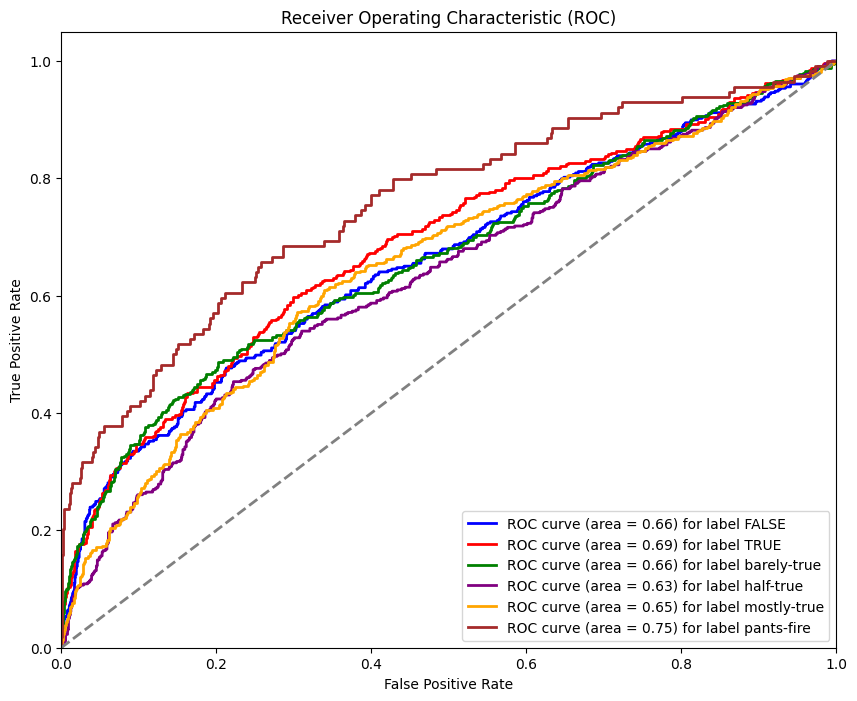

In [ ]:
import time
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score, roc_curve, auc
)
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    BaggingClassifier,
    VotingClassifier,
    StackingClassifier,
)
from sklearn.naive_bayes import MultinomialNB
import transformers
from torch.utils.data import DataLoader, TensorDataset
import torch
import matplotlib.pyplot as plt


# Preprocessing and tokenization
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    text = [word for word in text if word not in stopwords.words('english')]
    text = [stemmer.stem(lemmatizer.lemmatize(word)) for word in text]
    return ' '.join(text)

data['text'] = data['text'].apply(preprocess)

# Split the dataset into features and labels
X = data['text']
y = data['label']

# Encode labels if they are not already in numeric format
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_validation_tfidf = tfidf_vectorizer.transform(X_validation)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Define hyperparameters and their possible values for tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1.0, 10.0],
    'max_iter': [100, 200, 300],
}

# Create a Logistic Regression classifier
classifier = LogisticRegression(solver='liblinear')

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_tfidf, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# ...

# Train a Logistic Regression classifier with the best hyperparameters
best_classifier = LogisticRegression(solver='liblinear', **best_params)
best_classifier.fit(X_train_tfidf, y_train)

# Evaluate the best classifier on the validation set
y_validation_pred = best_classifier.predict(X_validation_tfidf)
validation_accuracy = accuracy_score(y_validation, y_validation_pred)

print("Best Hyperparameters:", best_params)
print("Validation Accuracy with Tuned Hyperparameters:", validation_accuracy)

# Evaluate the best classifier on the test set
y_test_pred = best_classifier.predict(X_test_tfidf)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Test Accuracy with Tuned Hyperparameters:", test_accuracy)

# Calculate predicted probabilities for each class
y_test_pred_prob = best_classifier.predict_proba(X_test_tfidf)

# Calculate ROC and AUC scores for each label
n_classes = len(label_encoder.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()
y_test_bin = label_binarize(y_test, classes=range(n_classes))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_test_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each label
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown']  # Customize colors as needed
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'ROC curve (area = {roc_auc[i]:.2f}) for label {label_encoder.classes_[i]}')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Best Hyperparameters: {'C': 10.0, 'max_iter': 100}
Validation Accuracy with Tuned Hyperparameters: 0.36744639376218324
Test Accuracy with Tuned Hyperparameters: 0.3779834388699464


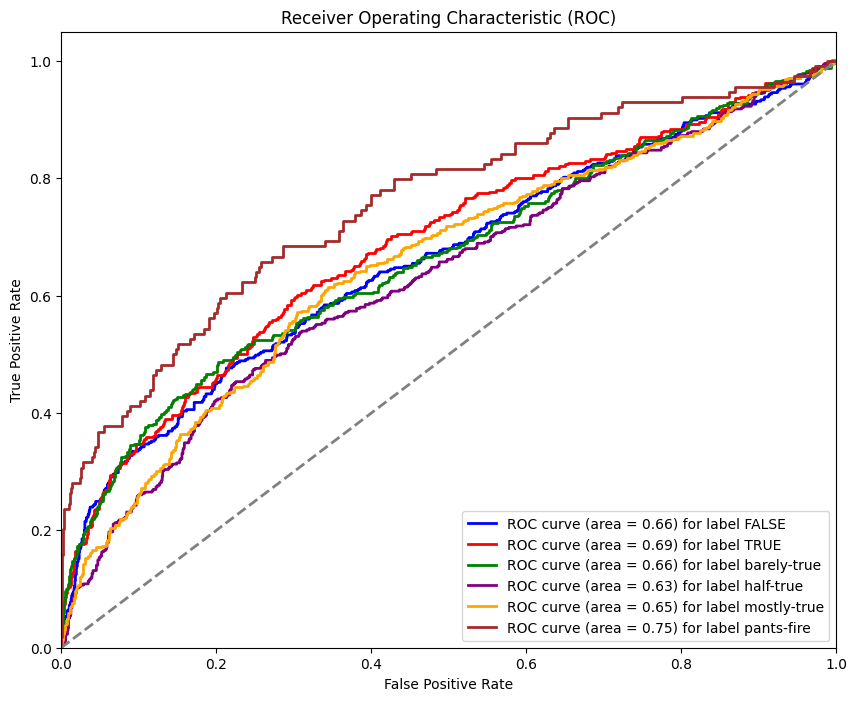

In [ ]:
import time
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import label_binarize

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score, roc_curve, auc
)
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    BaggingClassifier,
    VotingClassifier,
    StackingClassifier,
)
from sklearn.naive_bayes import MultinomialNB
import transformers
from torch.utils.data import DataLoader, TensorDataset
import torch
import matplotlib.pyplot as plt



# Preprocessing and tokenization
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    text = [word for word in text if word not in stopwords.words('english')]
    text = [stemmer.stem(lemmatizer.lemmatize(word)) for word in text]
    return ' '.join(text)

data['text'] = data['text'].apply(preprocess)

# Split the dataset into features and labels
X = data['text']
y = data['label']

# Encode labels if they are not already in numeric format
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_validation_tfidf = tfidf_vectorizer.transform(X_validation)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Define hyperparameters and their possible values for tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1.0, 10.0],
    'max_iter': [100, 200, 300],
}

# Create a Logistic Regression classifier
classifier = LogisticRegression(solver='liblinear')

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_tfidf, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train a Logistic Regression classifier with the best hyperparameters
best_classifier = LogisticRegression(solver='liblinear', **best_params)
best_classifier.fit(X_train_tfidf, y_train)

# Evaluate the best classifier on the validation set
y_validation_pred = best_classifier.predict(X_validation_tfidf)
validation_accuracy = accuracy_score(y_validation, y_validation_pred)

print("Best Hyperparameters:", best_params)
print("Validation Accuracy with Tuned Hyperparameters:", validation_accuracy)

# Evaluate the best classifier on the test set
y_test_pred = best_classifier.predict(X_test_tfidf)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Test Accuracy with Tuned Hyperparameters:", test_accuracy)

# Calculate predicted probabilities for each class
y_test_pred_prob = best_classifier.predict_proba(X_test_tfidf)  # Add this line

# Calculate ROC and AUC scores for each label
n_classes = len(label_encoder.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()
y_test_bin = label_binarize(y_test, classes=range(n_classes))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_test_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each label
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown']  # Customize colors as needed
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'ROC curve (area = {roc_auc[i]:.2f}) for label {label_encoder.classes_[i]}')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()
